<a href="https://colab.research.google.com/github/aamirk2244/code-python/blob/main/Decision_Tree_News_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")



In [194]:
#import dataset
df=pd.read_csv("news.csv")
df


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [195]:
df.isnull().sum()


Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [196]:
print("There are {} rows and {} columns.".format(df.shape[0],df.shape[1]))
df=df.drop(['Unnamed: 0'],axis=1)


There are 6335 rows and 4 columns.


In [197]:
df['label'].value_counts()


REAL    3171
FAKE    3164
Name: label, dtype: int64

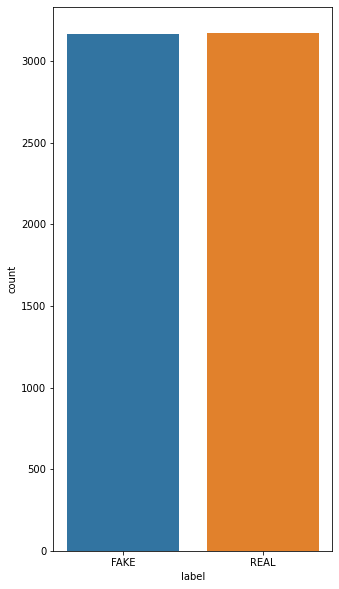

In [198]:
plt.figure(figsize=(5,10));
sns.countplot(df['label']);

In [199]:
x = df.iloc[ : , :-1].values                   # converting columns to 2d array
y = df.iloc[ : , -1].values                          # converting label column to  array

In [200]:
x

array([['You Can Smell Hillary’s Fear',
        'Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe

In [201]:
y                  # contains the label column (i.e class column)

array(['FAKE', 'FAKE', 'REAL', ..., 'FAKE', 'REAL', 'REAL'], dtype=object)

In [202]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words="english",max_features=1000)

In [203]:
vect

CountVectorizer(max_features=1000, stop_words='english')

In [204]:
x1=vect.fit_transform(x[:,0]).todense()                    # title column
x2=vect.fit_transform(x[:,1]).todense()                      #  text column
x_mat=np.hstack((x1,x2))

In [205]:
x2

matrix([[0, 0, 0, ..., 0, 2, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [206]:
x

array([['You Can Smell Hillary’s Fear',
        'Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe

In [207]:
x[:,0]                              # these are title column  text

array(['You Can Smell Hillary’s Fear',
       'Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO)',
       'Kerry to go to Paris in gesture of sympathy', ...,
       'Anti-Trump Protesters Are Tools of the Oligarchy     : Information',
       'In Ethiopia, Obama seeks progress on peace, security in East Africa',
       "Jeb Bush Is Suddenly Attacking Trump. Here's Why That Matters"],
      dtype=object)

In [208]:
x[:,1]                     #  from text column

array(['Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership is being warned that th

In [209]:
x_mat                     # final matrix created , changed to numeric data

matrix([[0, 0, 0, ..., 0, 2, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [210]:
len(x_mat)

6335

In [211]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_mat,y,test_size=0.005, random_state=10)

In [212]:
y_train

array(['FAKE', 'FAKE', 'REAL', ..., 'FAKE', 'FAKE', 'REAL'], dtype=object)

In [213]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy')


In [214]:
model.fit(x_train,y_train)                        # training x and y



DecisionTreeClassifier(criterion='entropy')

In [215]:
y_pred=model.predict(x_test)
x_test


matrix([[0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0]])

In [216]:

y_pred

array(['REAL', 'FAKE', 'FAKE', 'REAL', 'REAL', 'FAKE', 'REAL', 'REAL',
       'REAL', 'FAKE', 'FAKE', 'REAL', 'REAL', 'FAKE', 'REAL', 'FAKE',
       'REAL', 'FAKE', 'FAKE', 'FAKE', 'FAKE', 'REAL', 'FAKE', 'REAL',
       'FAKE', 'REAL', 'REAL', 'REAL', 'REAL', 'FAKE', 'FAKE', 'REAL'],
      dtype=object)

In [217]:
d = list(y_pred)
len(d)

32

In [218]:
x_test

matrix([[0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0]])

In [219]:
len(x_test)

32

In [220]:
# np.where(y_test[50])

Finding Accuracy

In [221]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy=accuracy_score(y_pred,y_test)*100
print("Accuracy of the model is {:.2f}".format(accuracy))



Accuracy of the model is 78.12


In [222]:
confusion_matrix(y_pred,y_test)



array([[12,  3],
       [ 4, 13]])

**Testing on Outer Dataset**

In [248]:
nf=pd.read_csv("news.csv")

# nf = nf[0:]
label = nf['label']                    # last row  contain real class
nf=nf.drop(['Unnamed: 0'],axis=1)
nf=nf.drop(['label'],axis=1)                   # removing the class column as we want to predict our input rows
print('this label -> ', label)

n1=vect.fit_transform(nf['title'].values).todense()                    # title column
n2=vect.fit_transform(nf['text'].values).todense()                      #  text column
n_mat=np.hstack((n1,n2))
# n1
res =  model.predict(n_mat)
print('result -> ', res)               

this label ->  0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object
result ->  ['FAKE' 'FAKE' 'REAL' ... 'FAKE' 'REAL' 'REAL']


In [245]:
res[4]                   # means 4rth row is predicted as REAL

'REAL'